### Time series forecasting - basic usage

In this project we will use some tools for analyzing and forecasting time series, making the corrections to the series, and validating that the process meet the conditions for applying an autorregresive model

The data for the analysis can be found in https://www.conaf.cl/incendios-forestales/incendios-forestales-en-chile/estadisticas-historicas/

The first step before diving into the analysis is to load the packages that contain the functions required for a suitable time series analysis and others related to data manipulation

In [42]:
require(ggplot2) # Graphical tools
require(dplyr) # Required for data manipulation
require(forecast) # Functions for time series analysis
require(tseries) # Functions for time series analysis

After reading the data we run the head() and tail() functions in order to visualize the first and last rows of our data, it can be seen that the time series data corresponds to a period from 2000 to 2022 with monthly number of fires, it is ordered so there is no need to create or manipulate features and rows in this step

In [44]:
wildfires <- read.csv2('C:\\Users\\gonza\\Desktop\\Proyectos\\wildfires\\Wildfires_data.csv') # Reading file with data
head(wildfires) # visualization of first rows
tail(wildfires) # visualization of last rows

Anio.inicio,Anio.fin,Mes.Numero,Mes,Periodo,Incendios
2000,2001,1,Enero,2000-Enero,0
2000,2001,2,Febrero,2000-Febrero,0
2000,2001,3,Marzo,2000-Marzo,0
2000,2001,4,Abril,2000-Abril,54
2000,2001,5,Mayo,2000-Mayo,293
2000,2001,6,Junio,2000-Junio,1008


,Anio.inicio,Anio.fin,Mes.Numero,Mes,Periodo,Incendios
271,2022,2023,7,Julio,2022-Julio,1730
272,2022,2023,8,Agosto,2022-Agosto,1201
273,2022,2023,9,Septiembre,2022-Septiembre,915
274,2022,2023,10,Octubre,2022-Octubre,514
275,2022,2023,11,Noviembre,2022-Noviembre,83
276,2022,2023,12,Diciembre,2022-Diciembre,15


With the options() command we change the size of our plots in terms of width and height, after running this part we create our time series variable with the ts() function, note that this function require the variable, the date of begining and the frequency which in this case is monthly (12).

The ts.plot() function creates a plot of the time series ordered by period (year in this case), it can be seen that the data has seasonality, and at first glance it can not be seen any kind of trend either upward or downward

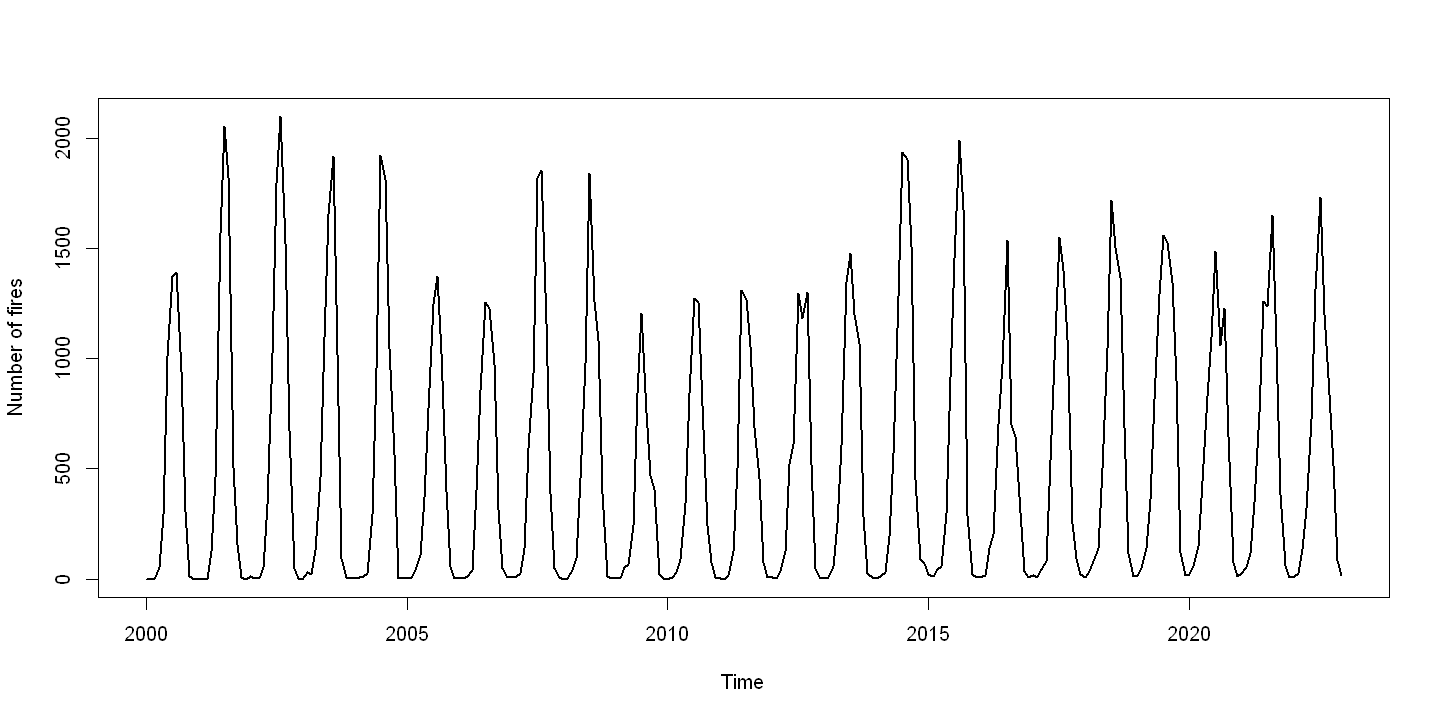

In [45]:
options(repr.plot.width = 12, repr.plot.height = 6)
wildfires.ts <- ts(wildfires$Incendios, c(2000, 01), frequency = 12)
ts.plot(wildfires.ts, lwd = 2, ylab = "Number of fires")

Time series data can show a patterns and characteristics of interest for the analysis, these components are helpful for understanding the behavior of the series and allow to explain a part of the phenomena we are analyzing just by looking to the series. Components of the time series can be categorized into Seasonality ($S_t$), Trend ($T_t$) and a random component ($R_t$). Depending on the assumption done over the series we can write,

\begin{equation}
y_t = S_t + T_t + R_t
\end{equation}
if we assume an additive decomposition, either we can write,

\begin{equation}
y_t = S_t \times T_t \times R_t
\end{equation}
if we assume a multiplicative decomposition, a word of advise is that if the magnitude of the series, the seasonal fluctuations, and the variations around the trend or cycle do not vary over time is appropriate to assume a multiplicative decomposition, in case we assume a multiplicative decomposition we can write the series as,

\begin{equation}
\text{log}(y_t) = \text{log}(S_t) + \text{log}(T_t) + \text{log}(R_t)
\end{equation}

With decompose() function we can separate the main components of the time series, these components are the trend, seasonality, and random effects. The trend component does not show any kind of behavior, while is notorious the seasonal component in the series 

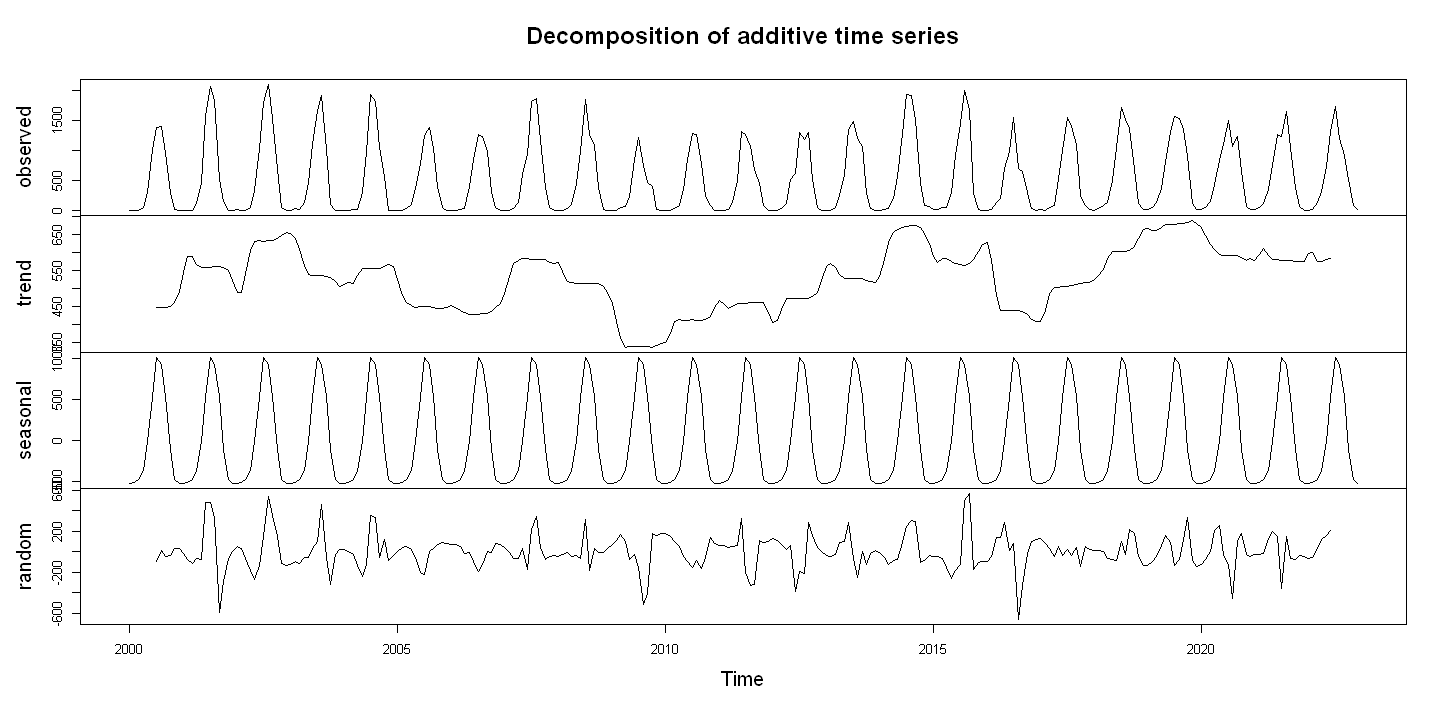

In [46]:
plot(decompose(wildfires.ts))

### Stationary time series

A stationary time series is a series whose characteristics, properties and features do not depend of $t$, so we can asume that the levels of the series are constant over time. The most common technique for adjusting a series and get a stationary process is to apply differencing operators, the differenced series is the change between the series seen in a point $t$, say, $y_t$ and a previous value of the series $t-k$, say, $y_{t-k}$, for a local differentiation we can write,

\begin{equation}
y_t^{*} = y_t - y_{t-1}
\end{equation}

The model for the original series can be written as follows,

\begin{equation}
y_t - y_{t-1} = \epsilon_t \rightarrow y_t^{*} = \epsilon_t
\end{equation}
where $\epsilon_t$ denotes a white noise process, also called as random walk. Note that the differentiation can be done in various lags, when we apply a differentiation of order 1 we call it local differentation, and when the differentiation is applied in seasonal terms like 6 or 12 we call it a seasonal differenciation

### Backshift notation

The backward shift operator is useful for writing the lags of the model, it is represented as $B$ and can be written as follows,

\begin{equation}
B y_t = y_{t-1}
\end{equation}
the previous operator has a local differencing operator, if we use two applications of this operator we write,

\begin{equation}
B(B y_t) = B^2 y_t = y_{t-2}
\end{equation}

In general it is represented as,

\begin{equation}
y_t^{*} = y_t - y_{t-1} = y_t - By_t = (1-B)y_t
\end{equation}
and for any value of differencing operator we write,

\begin{equation}
(1-B)^d y_t
\end{equation}

For instance, we can write a process described by a seasonal difference and a local difference at the same time, this can be written as,

\begin{equation}
(1-B)(1-B)^{m}y_t = (1-B-B^m + B^{m+1})y_t
\end{equation}

### Kwiatkowski–Phillips–Schmidt–Shin (KPSS) test

The KPSS test is a tool used in econometric models for testing if a time series is stationary around a trend, said trend-stationary, against an alternative hypothesis of unit root (non-stationary).

### Augmented Dickey–Fuller (ADF) test

One of the most common test for evaluates if a series has a unit root, thus, it is no stationary is the ADF, which tests a null hypothesis that there is presence of unit root in a time series against an alternative hypothesis for stationarity or trend-stationarity within the process.

The first step before dive into the model stage is to get a stationary process in our time series, for this we can apply some techniques that allow for getting a process with such characteristic, in this case we apply a log() transformation and a differentiation of order 12, this due to the seasonal component in the series, it is worth noting that for seasonal time series it is advisable to make a seasonal differentiation before local differentiation.

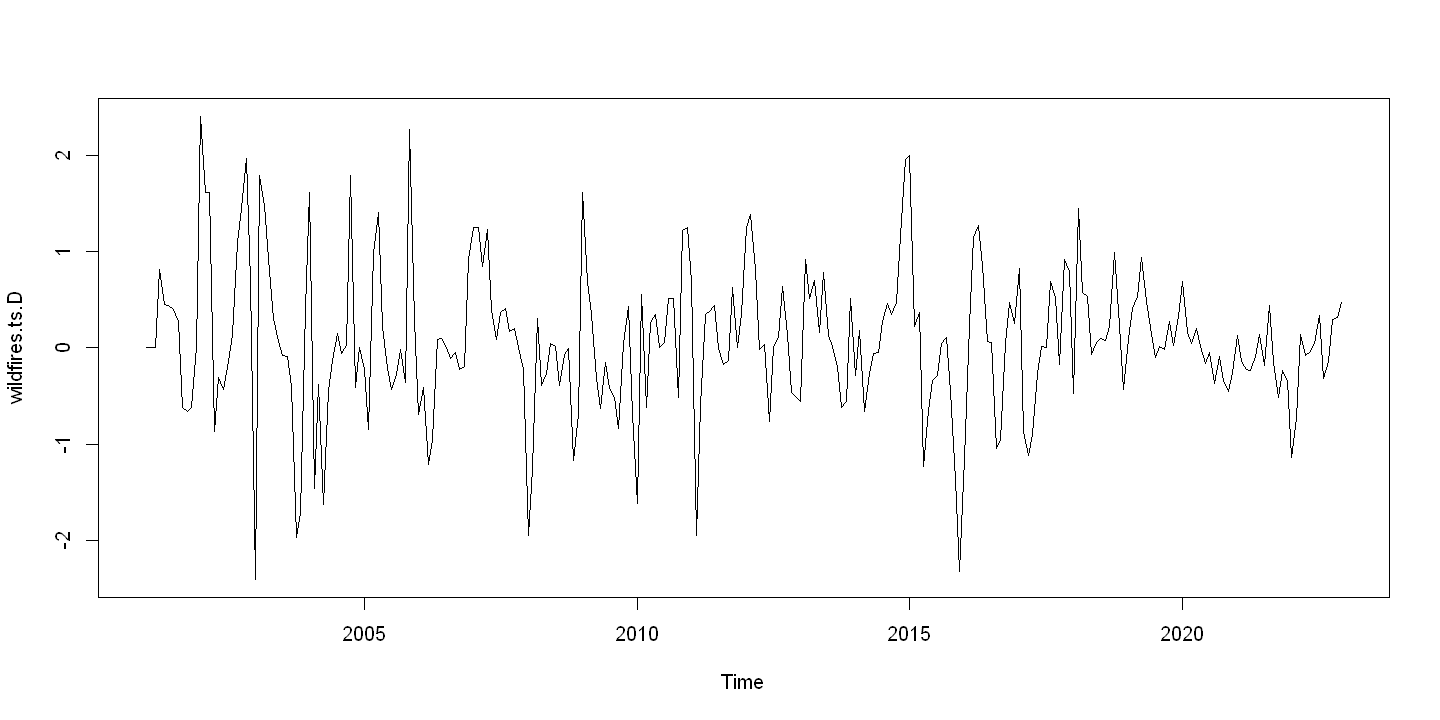

In [47]:
wildfires.ts.D <- diff(log(wildfires.ts+1), 12)
ts.plot(wildfires.ts.D)

After applying the differentation operator (seasonal for this case), the KPSS test does not reject the null hypothesis while the Augmented Dickey-Fuller test reject the null hypothesis so the time series can be considered as stationary

In [48]:
kpss.test(wildfires.ts.D)
adf.test(wildfires.ts.D)

Warning message in kpss.test(wildfires.ts.D):
"p-value greater than printed p-value"


	KPSS Test for Level Stationarity

data:  wildfires.ts.D
KPSS Level = 0.065335, Truncation lag parameter = 5, p-value = 0.1


Warning message in adf.test(wildfires.ts.D):
"p-value smaller than printed p-value"


	Augmented Dickey-Fuller Test

data:  wildfires.ts.D
Dickey-Fuller = -5.3624, Lag order = 6, p-value = 0.01
alternative hypothesis: stationary


The histogram for the time series data shows a distribution between -2 and 2 symmetrical with respect to 0, similar to a normal distribution

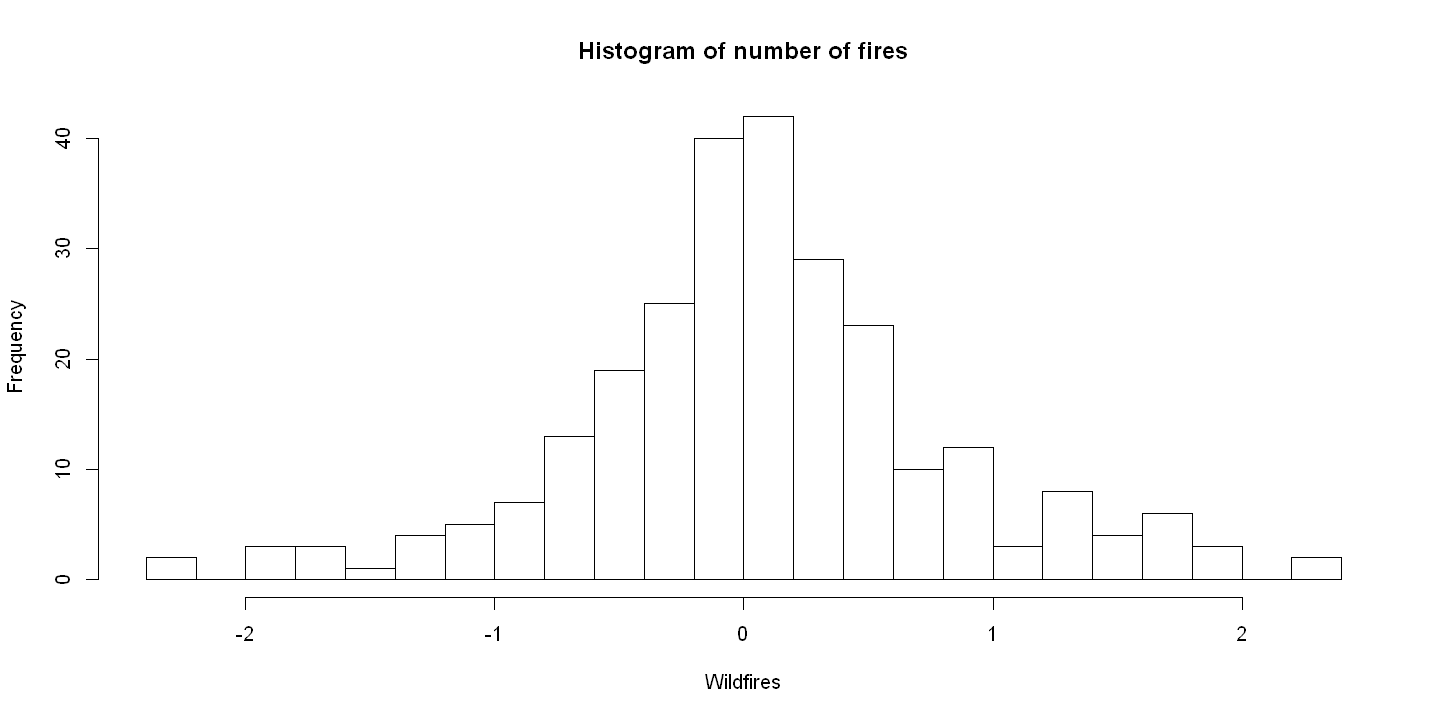

In [49]:
hist(wildfires.ts.D, "fd", main = "Histogram of number of fires", ylab = "Frequency", xlab = "Wildfires")

With the data adjusted and some validations done to the process we can start with the autocorrelation for getting the values of components of the autorregresive time series model.

The ACF plot corresponds to the autocorrelations of the series, it can be seen that some values stay outside the confidence levels around zero, with cyclical behavior around it, the PACF plot corresponds to the partial autocorrelation of the series, and similar to the ACF plot, some values stay outside the confidence intervals, with this we can think about a model with values of $p,q,P,Q \in \{0,1,2 \}$ for a ARIMA or SARIMA. A problem that we can see about it is that we want to get rid of the cyclical components, so just for cleaning our series we will apply a new differentiation over the series with a local component.

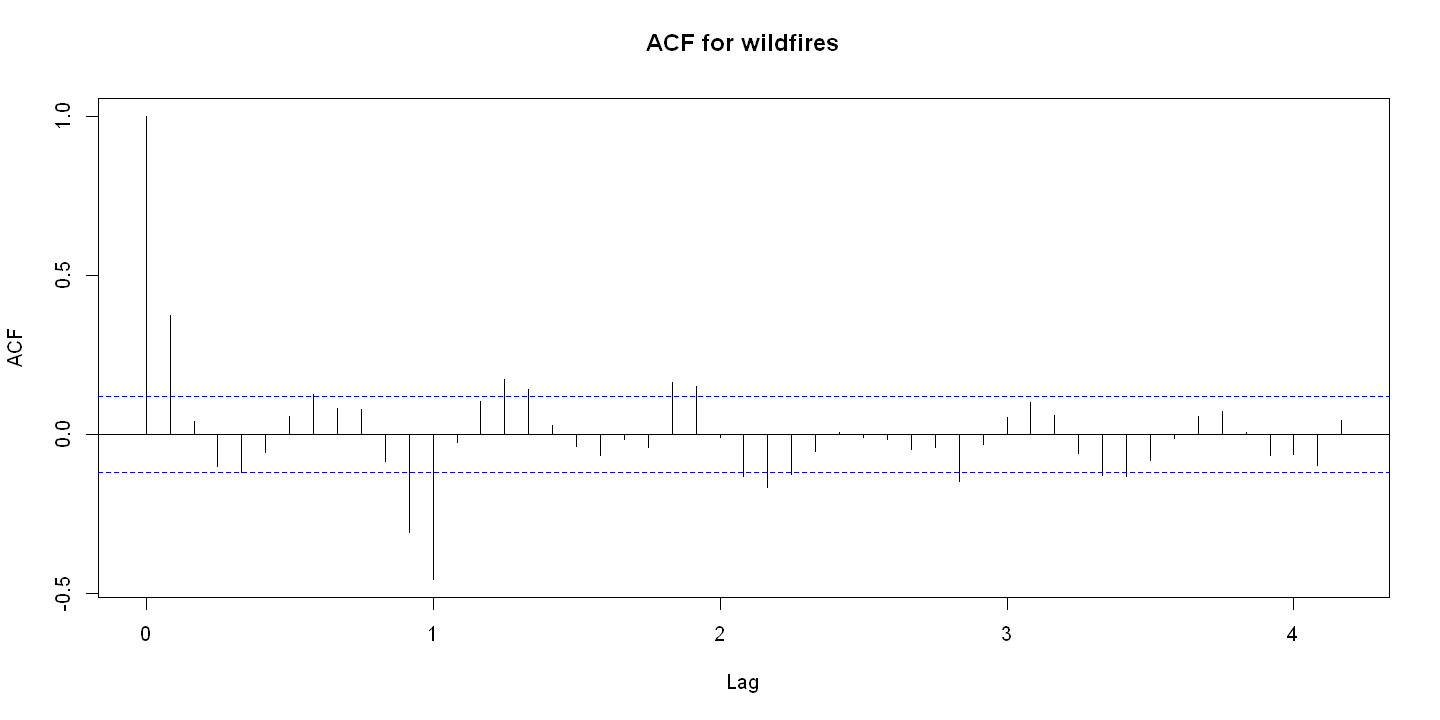

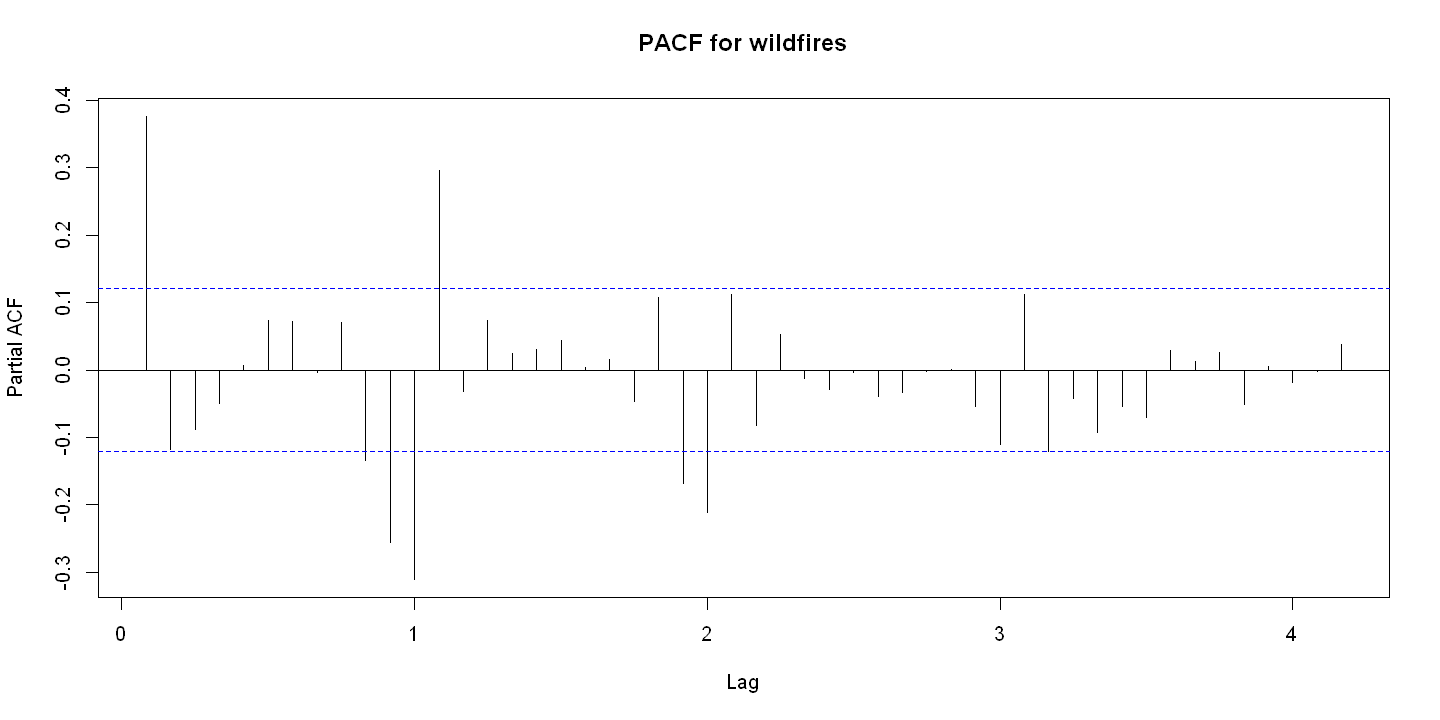

In [50]:
acf(wildfires.ts.D, lag.max = 50, main = "ACF for wildfires")
pacf(wildfires.ts.D, lag.max = 50, main = "PACF for wildfires")

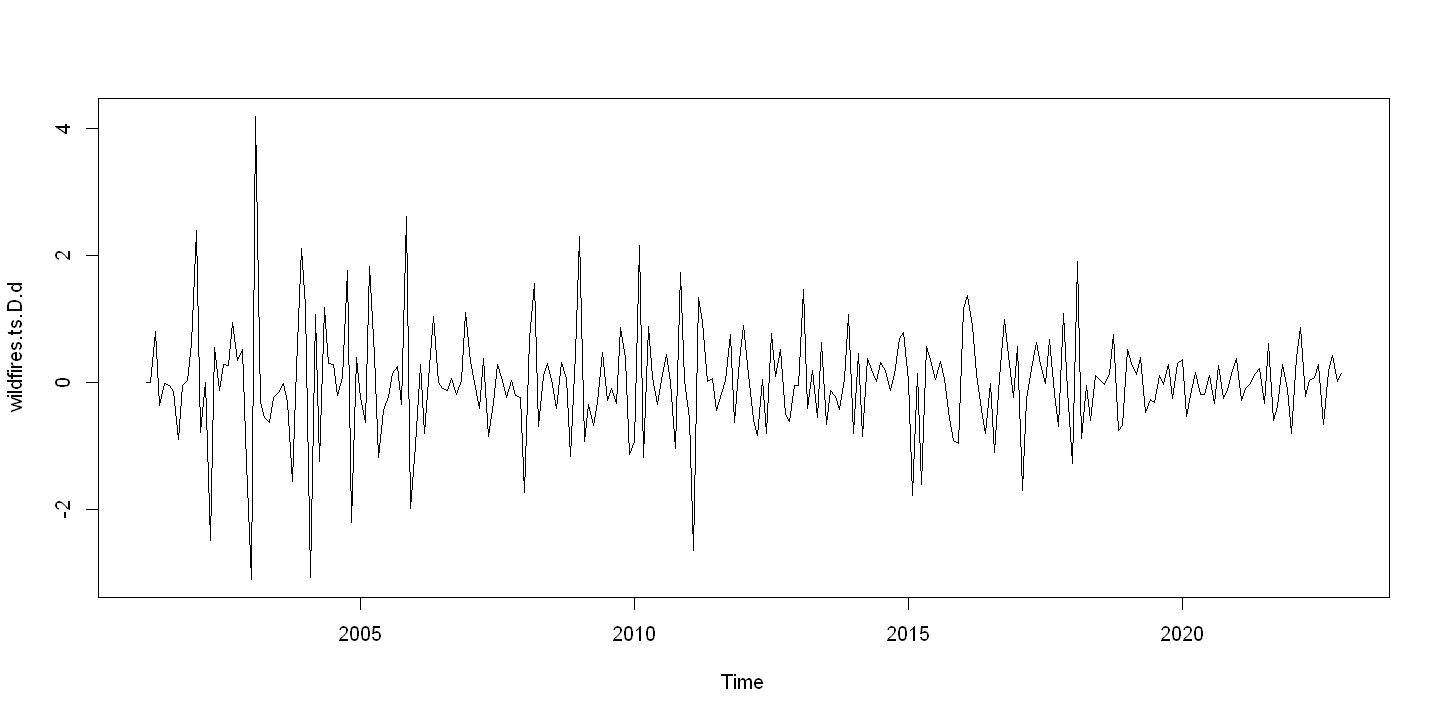

In [51]:
wildfires.ts.D.d <- diff(wildfires.ts.D, 1)
ts.plot(wildfires.ts.D.d)

In [52]:
kpss.test(wildfires.ts.D.d)
adf.test(wildfires.ts.D.d)

Warning message in kpss.test(wildfires.ts.D.d):
"p-value greater than printed p-value"


	KPSS Test for Level Stationarity

data:  wildfires.ts.D.d
KPSS Level = 0.013246, Truncation lag parameter = 5, p-value = 0.1


Warning message in adf.test(wildfires.ts.D.d):
"p-value smaller than printed p-value"


	Augmented Dickey-Fuller Test

data:  wildfires.ts.D.d
Dickey-Fuller = -10.574, Lag order = 6, p-value = 0.01
alternative hypothesis: stationary


Now we have get rid off of the cyclical components and less points of the ACF and PACF plots stay outside the confidence intervals around zero

acf(wildfires.ts.D.d, lag.max = 50, main = "ACF for wildfires")
pacf(wildfires.ts.D.d, lag.max = 50, main = "PACF for wildfires")

In order to test the model we will train a time series model with values up to December 2020 while the next two years (2021 and 2022) will be used for validation and comparison of different models in terms of errors

In [54]:
wildfires.test <- wildfires$Incendios[which(wildfires$Anio.inicio >= 2021)]
wildfires.ts <- wildfires.ts[1:(length(wildfires.ts)-24)]

### Autoregressive models (AR)

Autoregressive models have the characteristic of forecast the response variable using linear combinations of past values of the same variable. It is called autoregressive indicating that is a regression of a variable against its same values from the past in a temporal order. Any autoregressive model can be written as,

\begin{equation}
y_t = c + \phi_1 y_{t-1} + \phi_2 y_{t-2} + ... + \phi_p y_{t-p} + \epsilon_t
\end{equation}

### Moving average models (MA)

A moving average model rather than using past values of the response variable for making a forecast it uses past errors as a regression model, this can be written as,

\begin{equation}
y_t = c + \epsilon_t + \theta_1 \epsilon_{t-1} + \theta_2 \epsilon_{t-2} + ... + \theta_p \epsilon_{t-p}
\end{equation}

### ARIMA model

With AR and MA models defined we can write all of it within a model in the following form,

\begin{equation}
(1 - \phi_1 B - ... - \phi_p B^p) y_t = (1 + \theta_1 B + ... + \theta_p B^p) \epsilon_t
\end{equation}

### SARIMA model

A SARIMA model (Seasonal + ARIMA) is formed including seasonal terms to any ARIMA model, it is written as follows,

\begin{equation}
(1-\phi_1 B)(1- \Phi_1 B^m)(1-B)(1-B^m)y_t = (1+\theta B)(1+\Theta_1 B^m) \epsilon_t
\end{equation}

In order to compare the models fitted we use the MAPE as error metric, this can be written as follows,

\begin{equation}
\text{MAPE} = \frac{1}{N} \sum_{i=1}^{N} \frac{|y_t - \hat{y_t}|}{y_t}
\end{equation}

In [55]:
p <- c(0,1)
q <- c(0,1)
P <- c(0,1)
Q <- c(0,1)
models.test <- expand.grid(p,q,P,Q)
names(models.test) <- c('p','q','P','Q')
models.test$MAPE <- 0

for (i in 1:nrow(models.test)){
  model <- arima(wildfires.ts, 
                 order = c(models.test$p[i], 0, models.test$q[i]), 
                 seasonal = list(order = c(models.test$P[i], 1, models.test$Q[i]), period = 12))
  predictions <- as.vector(predict(model, 24)$pred)
  models.test$MAPE[i] <- mean(abs(predictions - wildfires.test) / wildfires.test)
}

After fitting a series of model we arrange them in terms of the error, for simplicity we have chosen MAPE as an indicator of performance. It can be seen that model with $P = 1$ and $Q = 0$ while $p,q = 0$ shows lower error metric

In [56]:
models.test %>% arrange(MAPE)

p,q,P,Q,MAPE
0,0,1,1,0.2435667
0,1,1,1,0.2510873
0,1,0,1,0.2536895
1,1,0,1,0.2538326
0,0,0,1,0.2545903
1,0,0,1,0.2561589
1,1,1,1,0.2564876
1,0,1,1,0.2593624
1,1,0,0,0.3255951
0,1,1,0,0.3347209


For validation of the model we see the inverse roots of the time series models, all the points stay inside the unit circle, moreover, in terms of residuals they distribute slightly normal some asymetrical with heavy tail to the right, the only problem we can see is that there exists some autocorrelation in the error terms of the model and a proper model should have all the points inside the confidence intervals around to 0.

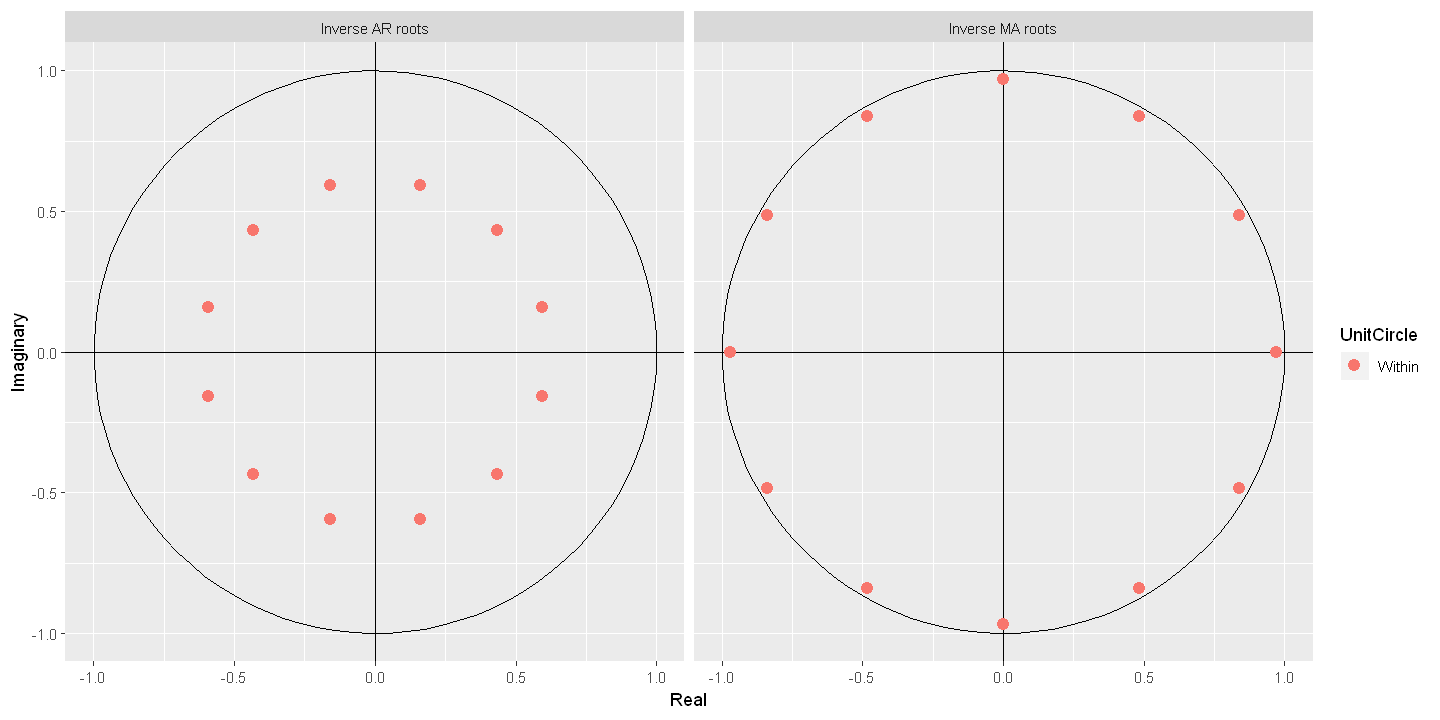


	Ljung-Box test

data:  Residuals from ARIMA(0,1,0)(1,1,1)[12]
Q* = 28.223, df = 8, p-value = 0.0004336

Model df: 2.   Total lags used: 10



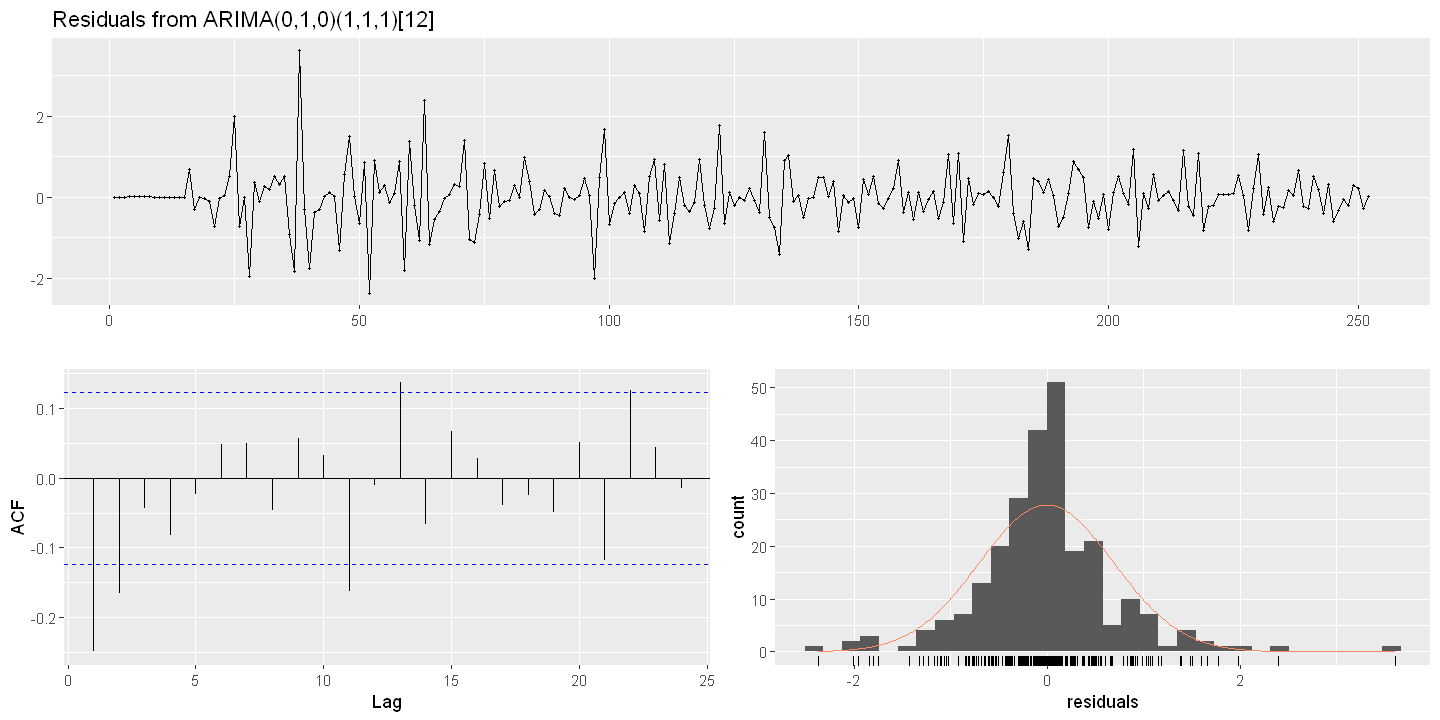

In [29]:
wildfires.model <- arima(log(wildfires.ts+1), order = c(0,1,0), seasonal = list(order = c(1,1,1), period = 12))
autoplot(wildfires.model)
checkresiduals(wildfires.model)

Prediction is done with 24 steps ahead, and is compared to the test values previously extracted from the data, the first comparison is with the model and the log() of the actual values of the series, it can be seen that the model captures correctly the seasonality and the movements of the series

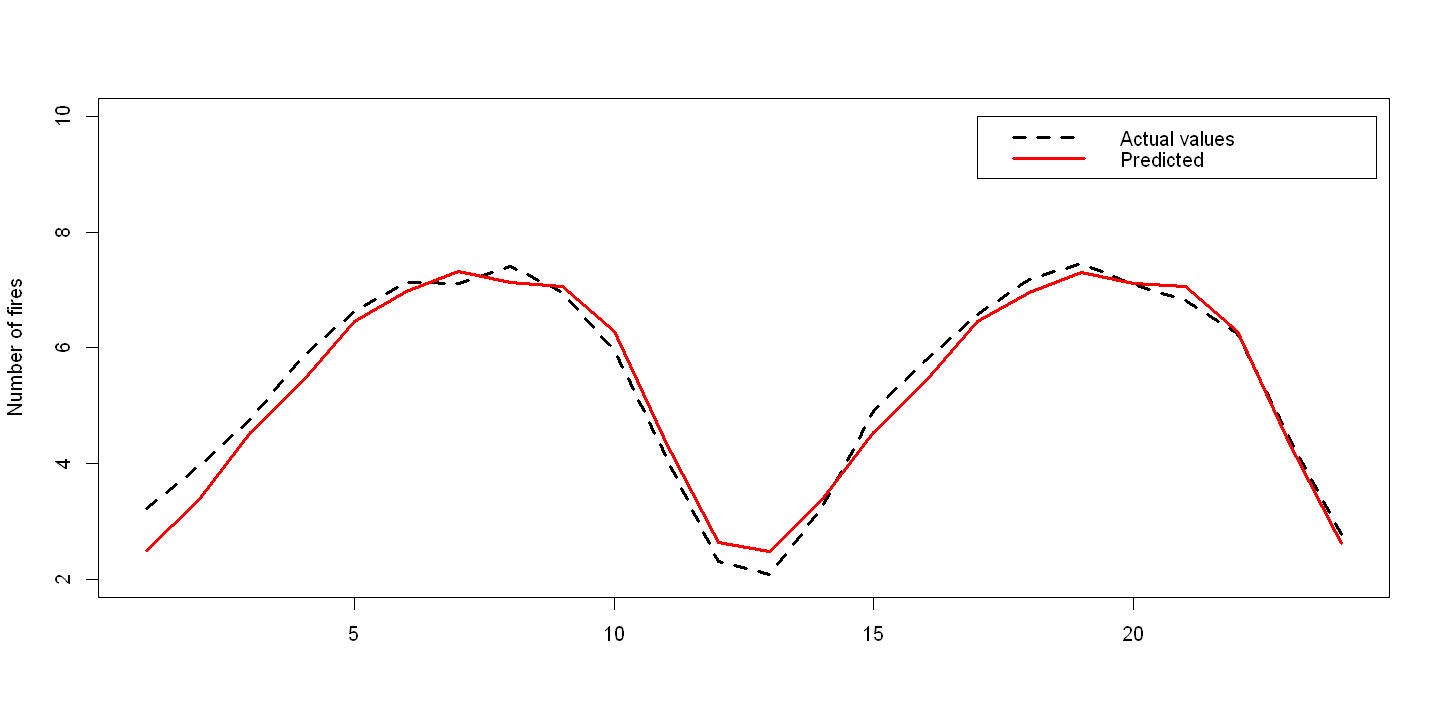

In [118]:
options(repr.plot.width = 12, repr.plot.height = 6)
plot(log(wildfires.test+1), type = "l", col = "black", xlab = "", ylab = "Number of fires", lty = 2, lwd = 3, ylim = c(2, 10))
lines(as.vector(predict(wildfires.model, 24)$pred), col = "red", lwd = 3)
legend(x = 17, y = 10, legend = c('Actual values', 'Predicted'), col = c('black', 'red'), lty = c(2, 1), lwd = c(3,3), box.col="black", cex = 1)

Same happens when applying the comparison but transforming the fitted values with exponential in order to eliminate the log component

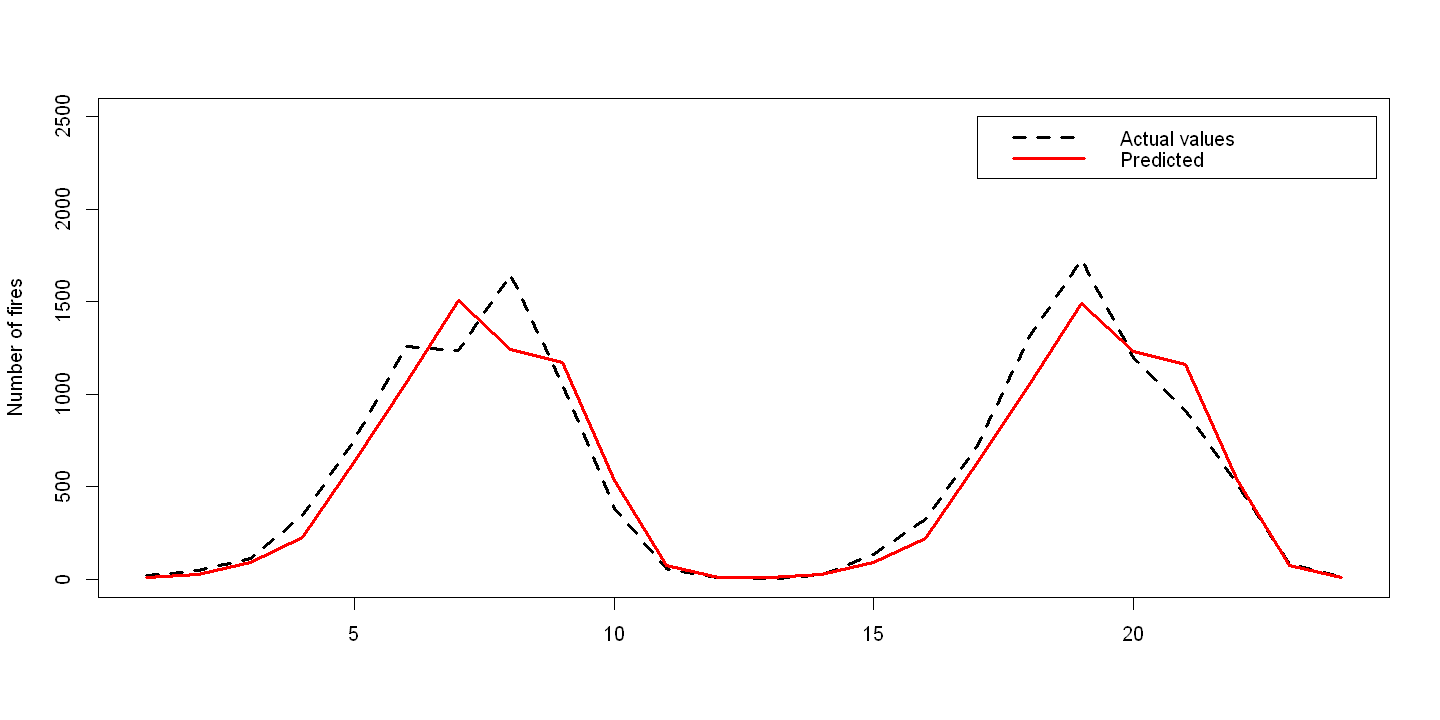

In [119]:
options(repr.plot.width = 12, repr.plot.height = 6)
plot(wildfires.test, type = "l", col = "black", xlab = "", ylab = "Number of fires", lty = 2, lwd = 3, ylim = c(2, 2500))
lines(exp(1)^as.vector(predict(wildfires.model, 24)$pred) - 1, col = "red", lwd = 3)
legend(x = 17, y = 2500, legend = c('Actual values', 'Predicted'), col = c('black', 'red'), lty = c(2, 1), lwd = c(3,3), box.col="black", cex = 1)

Forecasted values are plotted together with actual values of the series following the seasonality observed in the series, and also showing no trend in the prediction after 48 steps ahead

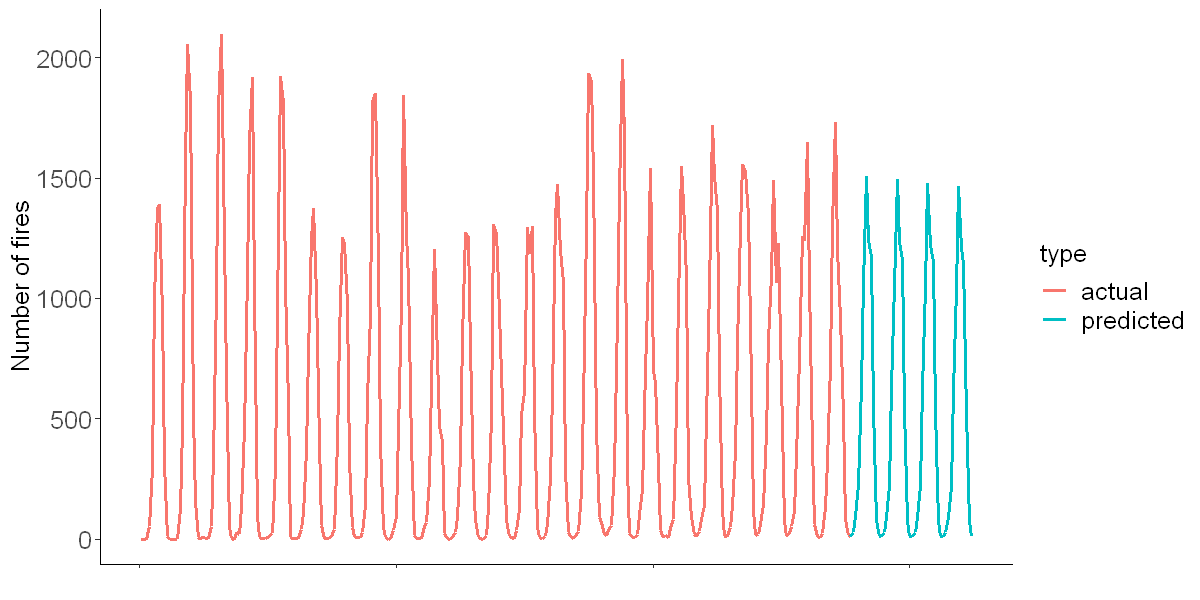

In [39]:
options(repr.plot.width = 10, repr.plot.height = 5)
predictions <- exp(1)^as.vector(predict(wildfires.model, 48)$pred) - 1
predictions.df <- data.frame(wildfires = c(wildfires$Incendios, predictions),
                             type = c(rep("actual", length(wildfires$Incendios)), rep("predicted", length(predictions))))
predictions.df$period <- 1:nrow(predictions.df)
predictions.df %>% ggplot(aes(x = period, group = 1, col = type)) + 
    geom_line(aes(y = wildfires), lwd = 1.0) + 
    theme_classic() + 
    theme(axis.text.x = element_blank(), 
          axis.text.y = element_text(size = 15), 
          axis.title.y = element_text(size = 15), 
          legend.text=element_text(size = 15), 
          legend.title = element_text(size = 15)) +
    xlab("") +
    ylab("Number of fires")